# Programming Exercise 1: Linear Regression

# 2.1 Plotting the Data

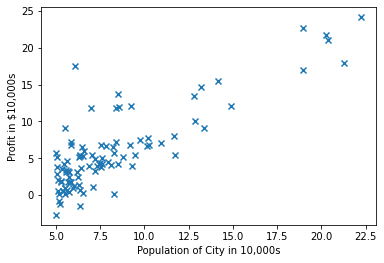

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/ex1data1.txt', header=None, names='xy')
plt.scatter(data['x'], data['y'], marker='x')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

# 2.2 Gradient Descent

In [2]:
import numpy as np

x1 = data['x'].values
X = np.array([np.ones(shape=(x1.shape)), x1]).T
y = data['y'].values

theta = np.zeros(2)
iterations = 1500
alpha = 0.01
m = len(y)

In [3]:
def compute_cost(X, y, theta):
    return 1 / 2 / m * sum((X[i, :] @ theta - y[i]) ** 2 for i in range(m))

compute_cost(X, y, theta)

32.072733877455654

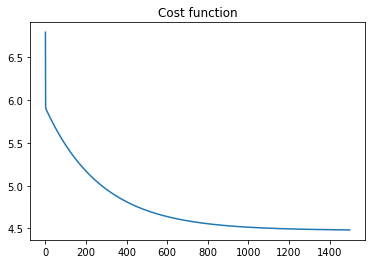

In [4]:
cost = []
for n in range(iterations):
    for j in range(len(theta)):
        minus = alpha * 1 / m * sum((X[i, :] @ theta - y[i]) * X[i, j] for i in range(m))
        theta[j] = theta[j] - minus
    cost.append(compute_cost(X, y, theta))
plt.plot(cost)
plt.title('Cost function')
plt.show()

In [5]:
predict1 = [1, 3.5] @ theta
predict2 = [1, 7] @ theta
predict1, predict2

(0.4483985780975761, 4.532860631674652)

# 2.3 Debugging

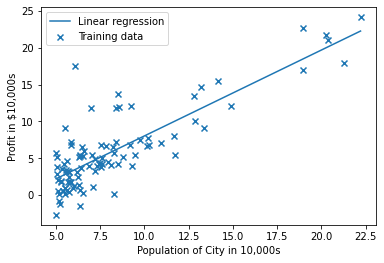

In [6]:
plt.scatter(data['x'], data['y'], marker='x', label='Training data')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

lrx = np.linspace(data['x'].min(), data['x'].max(), num=10)
lrxx = np.array([np.ones_like(lrx), lrx]).T
lry = lrxx @ theta

plt.plot(lrx, lry, label='Linear regression')
plt.legend()
plt.show()

# 2.4 Visualizing J(θ)

In [7]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
j_vals = [compute_cost(X, y, np.array([theta0, theta1])) for theta0 in theta0_vals for theta1 in theta1_vals]
j_vals = np.array(j_vals).reshape((len(theta0_vals), len(theta1_vals)))
j_vals

array([[328.09290555, 316.6648683 , 305.44447299, ..., 186.35412584,
        195.06735595, 203.98822799],
       [323.26504192, 311.92025945, 300.7831189 , ..., 189.60197489,
        198.39845977, 207.40258658],
       [318.47799046, 307.21646275, 296.16257698, ..., 192.89063611,
        201.77037576, 210.85775734],
       ...,
       [ 49.81156018,  46.45923561,  43.31455298, ..., 691.41691065,
        708.20585345, 725.20243817],
       [ 48.94247627,  45.67340647,  42.61197861, ..., 698.62353943,
        715.49573699, 732.57557648],
       [ 48.11420452,  44.9283895 ,  41.95021641, ..., 705.87098036,
        722.82643269, 739.98952696]])

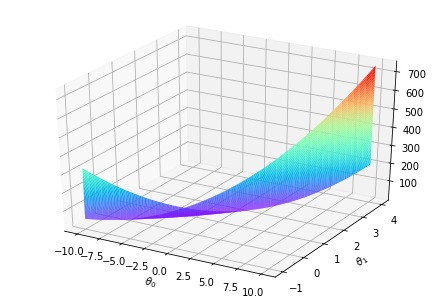

In [8]:
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())
ax.plot_surface(theta0_vals, theta1_vals, j_vals, cmap=plt.get_cmap('rainbow'))
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.show()

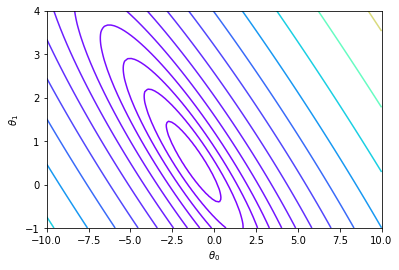

In [9]:
plt.contour(theta0_vals, theta1_vals, j_vals, cmap=plt.get_cmap('rainbow'), levels=np.logspace(-2, 3, 30))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

# 3 Linear regression with multiple variables


In [18]:
data = pd.read_csv('data/ex1data2.txt', header=None)
X0 = data.values[:, :2]
y = data.values[:, 2]
X0.shape, y.shape

((47, 2), (47,))

# 3.1 Feature Normalization

In [19]:
MU = X0.mean(axis=0)
SIGMA = X0.std(axis=0)

def feature_normalize(X):
    return np.concatenate((np.ones((X.shape[0], 1)), (X - MU) / SIGMA), axis=1)

X = feature_normalize(X0)
X.shape

(47, 3)

# 3.2 Gradient Descent

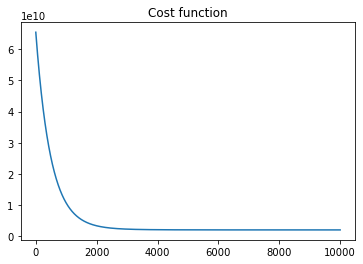

array([340397.28199562, 108736.46443478,  -5867.03988583])

In [36]:
from scipy.optimize import fmin_cg

def hypothesis(theta, z):
    return z @ theta

def cost_function(theta, X, y):
    return 0.5 * ((hypothesis(theta, X) - y) ** 2).mean()

def gradient(theta, X, y):
    m = len(y)
    return 1 / m * X.T @ (hypothesis(theta, X) - y)

def gradient_descent(X, y, theta, alpha, iterations, costs):
    for n in range(iterations):
        theta -= alpha * gradient(theta, X, y)
        costs.append(cost_function(theta, X, y))

    plt.plot(costs)
    plt.title('Cost function')
    plt.show()

theta = np.zeros(3)
costs = []
gradient_descent(X, y, theta, alpha=0.001, iterations=10000, costs=costs)
theta

# 3.3 Normal Equations

In [35]:
theta_equa = np.linalg.inv(X.T @ X) @ X.T @ y
theta_equa

array([340412.65957447, 109447.79646964,  -6578.35485416])